In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [1]:
from BayesNet import BayesNet
import networkx as nx
import pandas as pd

# Generator

In [59]:
# creds for the awesome tool to
# https://github.com/MaxFaber1998/KR21_project2
import random
import itertools

class BNGenerator:
    def __init__(self, n_nodes, edge_weight=0.5):
        self.n_nodes = n_nodes
        self.edge_weight = edge_weight
        self.bayes_net = BayesNet()
        self.bayes_net.structure = self.generate_directed_acyclic_graph(self.n_nodes)
        self.generate_cpts()

    def generate_directed_acyclic_graph(self, n_nodes):
        G = nx.gnp_random_graph(n_nodes, self.edge_weight, directed=True)
        DAG = nx.DiGraph([(str(u), str(v), {'weight': random.randint(-10, 10)}) for (u, v) in G.edges() if u < v])
        assert nx.is_directed_acyclic_graph(DAG)
        # nx.draw(DAG)
        # plt.show()
        return DAG

    def generate_cpts(self):
        for node in self.bayes_net.structure.nodes:
            edges = list(self.bayes_net.structure.edges(node))
            if not len(edges):
                print()
            columns = [str(e) for _, e in edges] + ([node] if not len(edges) else [str(edges[0][0])]) + ['p'] # Columns for the new CPT
            cpt = []
            remaining_p = 1
            reversed_list = list(reversed(list(itertools.product([True, False], repeat=len(set(columns)-{'p'})))))
            for truth_values in reversed_list:
                remaining_p = 1 if remaining_p == 0 else remaining_p
                p = random.random() if remaining_p == 1 else remaining_p
                remaining_p = remaining_p - p if remaining_p == 1 else 0
                cpt.append(list(truth_values) + [round(p, 2)])
            pd_cpt = pd.DataFrame(cpt, columns=columns)
            self.bayes_net.structure.add_node(node, cpt=pd_cpt)

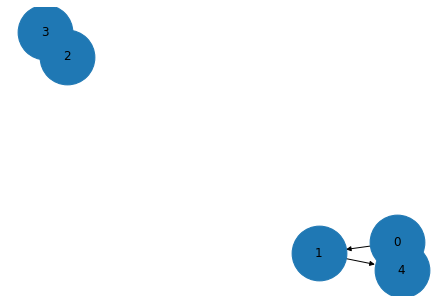

In [60]:
bn = BNGenerator(5).bayes_net
bn.draw_structure()

# Read the data

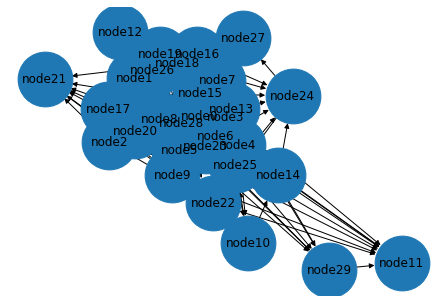

In [37]:
bn = BayesNet(verbose=0)
bn.load_from_bifxml('testing/X1.BIFXML')
bn.draw_structure()

In [98]:
# bn.prune_nodes(Q=set(['dog-out']), evidence=set(['bowel-problem']))

In [99]:
# bn.prune_edges(evidence=pd.Series({'dog-out': True}))

In [100]:
# bn.prune_network(Q=set(['dog-out']), evidence=pd.Series({'dog-out': True}))

In [101]:
# bn.min_degree_order()

In [102]:
# bn.min_fill_order()

In [103]:
# bn.variable_elimination(Q=set(['hear-bark']), order='min_degree_order')

In [104]:
# bn.sum_out(bn.get_cpt('dog-out'), 'hear-bark')

In [ ]:
bn.ve_mpe(evidence=pd.Series({"node22": False}),
          order='min_degree_order')

deleting node22->node11


In [115]:
bn.ve_map(set(['hear-bark']),
          evidence=pd.Series({"bowel-problem": False}),
          order='min_degree_order')

neighbors_dict
 {'light-on': ['family-out'], 'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['light-on', 'bowel-problem', 'dog-out']}
var_to_elim: light-on
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: hear-bark
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: bowel-problem
neighbors_dict
 {'dog-out': ['family-out'], 'family-out': ['dog-out']}
var_to_elim: dog-out
neighbors_dict
 {'family-out': []}
var_to_elim: family-out
processing light-on


,family-out,light-on,p
0,False,False,0.60
1,False,True,0.40
2,True,False,0.05
3,True,True,0.95


f


,family-out,light-on,p
0,False,False,0.60
1,False,True,0.40
2,True,False,0.05
3,True,True,0.95


f_i


,family-out,p
0,False,1.0
1,True,1.0


S
 {'bowel-problem':    bowel-problem     p
0          False  0.01, 'dog-out':    family-out  bowel-problem  dog-out     p
0       False          False    False  0.99
1       False          False     True  0.01
4        True          False    False  0.90
5        True          False     True  0.10, 'hear-bark':    dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99, 'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0}
processing bowel-problem


,bowel-problem,p
0,False,0.01


,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
4,True,False,False,0.90
5,True,False,True,0.10


f


,bowel-problem,family-out,dog-out,p
0,False,False,False,0.0099
1,False,False,True,0.0001
2,False,True,False,0.0090
3,False,True,True,0.0010


f_i


,family-out,dog-out,p
0,False,False,0.0099
1,False,True,0.0001
2,True,False,0.0090
3,True,True,0.0010


S
 {'hear-bark':    dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99, 'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0, 'bowel-problem*':    family-out  dog-out       p
0       False    False  0.0099
1       False     True  0.0001
2        True    False  0.0090
3        True     True  0.0010}
processing dog-out


,dog-out,hear-bark,p
0,False,False,0.70
1,False,True,0.30
2,True,False,0.01
3,True,True,0.99


,family-out,dog-out,p
0,False,False,0.0099
1,False,True,0.0001
2,True,False,0.0090
3,True,True,0.0010


f


,dog-out,hear-bark,family-out,p
0,False,False,False,0.006930
1,False,False,True,0.006300
2,False,True,False,0.002970
3,False,True,True,0.002700
4,True,False,False,0.000001
5,True,False,True,0.000010
6,True,True,False,0.000099
7,True,True,True,0.000990


f_i


,hear-bark,family-out,p
0,False,False,0.006931
1,False,True,0.006310
2,True,False,0.003069
3,True,True,0.003690


S
 {'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0, 'dog-out*':    hear-bark  family-out         p
0      False       False  0.006931
1      False        True  0.006310
2       True       False  0.003069
3       True        True  0.003690}
processing family-out


,family-out,p
0,False,0.15
1,True,0.85


,family-out,p
0,False,1.0
1,True,1.0


,hear-bark,family-out,p
0,False,False,0.006931
1,False,True,0.006310
2,True,False,0.003069
3,True,True,0.003690


f


,family-out,hear-bark,p
0,False,False,0.001040
1,False,True,0.000460
2,True,False,0.005363
3,True,True,0.003136


f_i


,hear-bark,p
0,False,0.006403
1,True,0.003597


S
 {'family-out*':    hear-bark         p
0      False  0.006403
1       True  0.003597}
processing hear-bark


,hear-bark,p
0,False,0.006403
1,True,0.003597


f


,hear-bark,p
0,False,0.006403
1,True,0.003597


,hear-bark,p
0,False,0.640315
1,True,0.359685


In [116]:
bn.variable_elimination(Q=set(['hear-bark']),
                        evidence=pd.Series({"bowel-problem": False}), 
                        order='min_degree_order')

neighbors_dict
 {'light-on': ['family-out'], 'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['light-on', 'bowel-problem', 'dog-out']}
var_to_elim: light-on
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem', 'hear-bark'], 'hear-bark': ['dog-out'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: hear-bark
neighbors_dict
 {'bowel-problem': ['family-out', 'dog-out'], 'dog-out': ['family-out', 'bowel-problem'], 'family-out': ['bowel-problem', 'dog-out']}
var_to_elim: bowel-problem
neighbors_dict
 {'dog-out': ['family-out'], 'family-out': ['dog-out']}
var_to_elim: dog-out
neighbors_dict
 {'family-out': []}
var_to_elim: family-out
processing light-on


,family-out,light-on,p
0,False,False,0.60
1,False,True,0.40
2,True,False,0.05
3,True,True,0.95


f


,family-out,light-on,p
0,False,False,0.60
1,False,True,0.40
2,True,False,0.05
3,True,True,0.95


f_i


,family-out,p
0,False,1.0
1,True,1.0


S
 {'bowel-problem':    bowel-problem     p
0          False  0.01, 'dog-out':    family-out  bowel-problem  dog-out     p
0       False          False    False  0.99
1       False          False     True  0.01
4        True          False    False  0.90
5        True          False     True  0.10, 'hear-bark':    dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99, 'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0}
processing bowel-problem


,bowel-problem,p
0,False,0.01


,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
4,True,False,False,0.90
5,True,False,True,0.10


f


,bowel-problem,family-out,dog-out,p
0,False,False,False,0.0099
1,False,False,True,0.0001
2,False,True,False,0.0090
3,False,True,True,0.0010


f_i


,family-out,dog-out,p
0,False,False,0.0099
1,False,True,0.0001
2,True,False,0.0090
3,True,True,0.0010


S
 {'hear-bark':    dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99, 'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0, 'bowel-problem*':    family-out  dog-out       p
0       False    False  0.0099
1       False     True  0.0001
2        True    False  0.0090
3        True     True  0.0010}
processing dog-out


,dog-out,hear-bark,p
0,False,False,0.70
1,False,True,0.30
2,True,False,0.01
3,True,True,0.99


,family-out,dog-out,p
0,False,False,0.0099
1,False,True,0.0001
2,True,False,0.0090
3,True,True,0.0010


f


,dog-out,hear-bark,family-out,p
0,False,False,False,0.006930
1,False,False,True,0.006300
2,False,True,False,0.002970
3,False,True,True,0.002700
4,True,False,False,0.000001
5,True,False,True,0.000010
6,True,True,False,0.000099
7,True,True,True,0.000990


f_i


,hear-bark,family-out,p
0,False,False,0.006931
1,False,True,0.006310
2,True,False,0.003069
3,True,True,0.003690


S
 {'family-out':    family-out     p
0       False  0.15
1        True  0.85, 'light-on*':    family-out    p
0       False  1.0
1        True  1.0, 'dog-out*':    hear-bark  family-out         p
0      False       False  0.006931
1      False        True  0.006310
2       True       False  0.003069
3       True        True  0.003690}
processing family-out


,family-out,p
0,False,0.15
1,True,0.85


,family-out,p
0,False,1.0
1,True,1.0


,hear-bark,family-out,p
0,False,False,0.006931
1,False,True,0.006310
2,True,False,0.003069
3,True,True,0.003690


f


,family-out,hear-bark,p
0,False,False,0.001040
1,False,True,0.000460
2,True,False,0.005363
3,True,True,0.003136


f_i


,hear-bark,p
0,False,0.006403
1,True,0.003597


S
 {'family-out*':    hear-bark         p
0      False  0.006403
1       True  0.003597}


,hear-bark,p
0,False,0.640315
1,True,0.359685


In [19]:
# bn.multiply_factors(bn.get_cpt('family-out'), bn.get_cpt('light-on'))

In [9]:
# bn.d_separated('light-on', 'bowel-problem', ['hear-bark'])

In [9]:
marg_test_1_df = pd.DataFrame({
    "A": [True, True, False, False],
    "B": [True, False, True, False],
    "p": [.54, .06, .08, .32]
})
marg_test_1_df

,A,B,p
0,True,True,0.54
1,True,False,0.06
2,False,True,0.08
3,False,False,0.32


In [10]:
bn.sum_out(marg_test_1_df, 'B')

,A,p
0,False,0.4
1,True,0.6


# Task 2. Performance evaluation

In [13]:
import time
from copy import deepcopy
from tqdm.notebook import tqdm

## MAP

In [17]:
results_map = {k: [] for k in ['min_degree_order', 'min_fill_order', 'random']}
for i in tqdm(range(50)):
    bngen = BNGenerator(20)
    for heur in ['min_degree_order', 'min_fill_order', 'random']:
        bn = deepcopy(bngen.bayes_net)
        start = time.time()
        bn.ve_map(set(['1']),
                  evidence=pd.Series({"2": False}),
                  order=heur)
        solution_time = time.time() - start 
        results_map[heur].append(solution_time)

  0%|          | 0/50 [00:00<?, ?it/s]

In [18]:
df_map = pd.DataFrame(results_map)
df_map

,min_degree_order,min_fill_order,random
0,2.700747,3.241259,7.061798
1,4.988709,4.595623,4.477041
2,3.007793,3.721060,4.168946
3,2.303194,2.644873,3.099924
4,6.939874,7.264802,13.991519
5,2.220921,1.819971,3.621574
6,1.200122,0.820309,2.164869
7,1.105468,1.251266,4.601951
8,2.365158,2.436319,3.348631
9,7.919301,8.610120,4.868933


In [19]:
df_map.to_csv("bn20heuristics.csv", index=False)

In [26]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(df_map['random'], df_map['min_fill_order'])
print(f'statistic {stat}, p {p}')
p_sig = 0.05
if p > p_sig:
    print("Considering a significance level = 0.05, Paired Student's t-test fails to reject the null hypothesis (p-value is greater than significance level). Therefore, we can claim that time variances are homogeneous/equal for both approaches")
else:
    print("Considering a significance level = 0.05, Paired Student's t-test rejects the null hypothesis (p-value is less or equal than significance level). Therefore, we can claim that time variances are not homogeneous/equal for both approaches")

statistic 5.427853143043161, p 1.7572564790019675e-06
Considering a significance level = 0.05, Paired Student's t-test rejects the null hypothesis (p-value is less or equal than significance level). Therefore, we can claim that time variances are not homogeneous/equal for both approaches


Text(0.5, 1.0, 'MAP execution time for BN with 20 nodes')

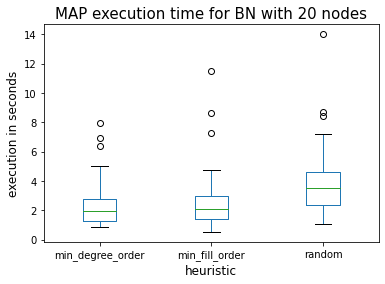

In [35]:
ax = df_map.plot(kind='box')
ax.set_xlabel("heuristic", fontsize=12)
ax.set_ylabel("execution in seconds", fontsize=12)
ax.set_title("MAP execution time for BN with 20 nodes", fontsize=15)

## MPE

In [21]:
results_mpe = {k: [] for k in ['min_degree_order', 'min_fill_order', 'random']}
for i in tqdm(range(50)):
    bngen = BNGenerator(20)
    for heur in ['min_degree_order', 'min_fill_order', 'random']:
        bn = deepcopy(bngen.bayes_net)
        start = time.time()
        bn.ve_mpe(evidence=pd.Series({"2": False}),
          order=heur)
        solution_time = time.time() - start 
        results_mpe[heur].append(solution_time)

  0%|          | 0/50 [00:00<?, ?it/s]

In [25]:
df_mpe = pd.DataFrame(results_mpe)
df_mpe

,min_degree_order,min_fill_order,random
0,1.504574,1.223866,2.304522
1,1.422539,1.580056,3.200428
2,2.620514,1.630075,2.908889
3,1.869259,1.835793,3.425259
4,3.237955,2.405341,4.513611
5,2.199408,2.029982,2.844120
6,2.298367,1.820733,2.677477
7,1.481559,1.063311,3.108492
8,1.054453,0.922920,1.636824
9,1.256362,2.387629,3.319641


In [28]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(df_mpe['random'], df_mpe['min_fill_order'])
print(f'statistic {stat}, p {p}')
p_sig = 0.05
if p > p_sig:
    print("Considering a significance level = 0.05, Paired Student's t-test fails to reject the null hypothesis (p-value is greater than significance level). Therefore, we can claim that time variances are homogeneous/equal for both approaches")
else:
    print("Considering a significance level = 0.05, Paired Student's t-test rejects the null hypothesis (p-value is less or equal than significance level). Therefore, we can claim that time variances are not homogeneous/equal for both approaches")

statistic 5.6993147404730555, p 6.777369876170538e-07
Considering a significance level = 0.05, Paired Student's t-test rejects the null hypothesis (p-value is less or equal than significance level). Therefore, we can claim that time variances are not homogeneous/equal for both approaches


Text(0.5, 1.0, 'MPE execution time for BN with 20 nodes')

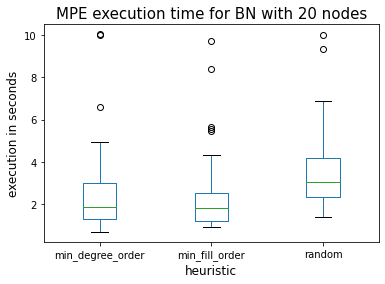

In [36]:
ax = df_mpe.plot(kind='box')
ax.set_xlabel("heuristic", fontsize=12)
ax.set_ylabel("execution in seconds", fontsize=12)
ax.set_title("MPE execution time for BN with 20 nodes", fontsize=15)

# Task 3

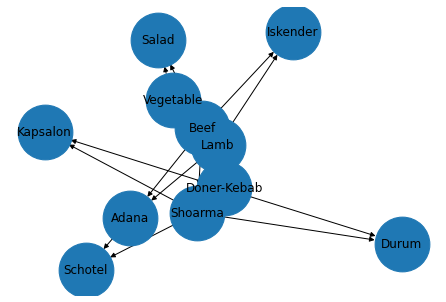

In [173]:
bn = BayesNet(verbose=0)
bn.load_from_bifxml('testing/delicious_food.BIFXML')
bn.draw_structure()

In [149]:
bn.get_all_variables()

['Beef',
 'Lamb',
 'Vegetable',
 'Iskender',
 'Doner-Kebab',
 'Shoarma',
 'Adana',
 'Salad',
 'Schotel',
 'Kapsalon',
 'Durum']

In [150]:
bn.get_all_cpts()

{'Beef':     Beef    p
 0  False  0.1
 1   True  0.9,
 'Lamb':     Lamb    p
 0  False  0.1
 1   True  0.9,
 'Vegetable':    Vegetable    p
 0      False  0.1
 1       True  0.9,
 'Iskender':     Lamb   Beef  Iskender     p
 0  False  False     False  0.98
 1  False  False      True  0.02
 2  False   True     False  0.60
 3  False   True      True  0.40
 4   True  False     False  0.55
 5   True  False      True  0.45
 6   True   True     False  0.50
 7   True   True      True  0.50,
 'Doner-Kebab':     Lamb   Beef  Doner-Kebab     p
 0  False  False        False  0.95
 1  False  False         True  0.05
 2  False   True        False  0.10
 3  False   True         True  0.90
 4   True  False        False  0.15
 5   True  False         True  0.85
 6   True   True        False  0.08
 7   True   True         True  0.92,
 'Shoarma':     Lamb   Beef  Shoarma     p
 0  False  False    False  0.98
 1  False  False     True  0.02
 2  False   True    False  0.02
 3  False   True     True  0.98


In [175]:
bn.variable_elimination(Q=set(['Shoarma']), order='min_degree_order')

,Shoarma,p
0,False,0.1376
1,True,0.8624


In [161]:
bn.variable_elimination(Q=set(['Shoarma']), 
                        evidence=pd.Series({"Lamb": False,
                                            "Beef": True}), 
                        order='min_degree_order')

,Shoarma,p
0,False,0.02
1,True,0.98


In [178]:
bn.variable_elimination(Q=set(['Salad']), order='min_degree_order')

,Salad,p
0,False,0.1144
1,True,0.8856


In [180]:
bn.variable_elimination(Q=set(['Salad']), 
                        evidence=pd.Series({"Lamb": True,
                                            "Beef": False}), 
                        order='min_degree_order')

,Salad,p
0,False,0.73
1,True,0.27


In [162]:
bn.variable_elimination(Q=set(['Shoarma']), 
                        evidence=pd.Series({"Lamb": True,
                                            "Beef": False}), 
                        order='min_degree_order')

,Shoarma,p
0,False,0.05
1,True,0.95


In [164]:
bn.variable_elimination(Q=set(['Shoarma']), 
                        evidence=pd.Series({"Lamb": True,
                                            "Beef": True}), 
                        order='min_degree_order')

,Shoarma,p
0,False,0.15
1,True,0.85


In [165]:
bn.variable_elimination(Q=set(['Adana']), 
                        evidence=pd.Series({"Lamb": False,
                                            "Beef": True}), 
                        order='min_degree_order')


,Adana,p
0,False,0.3
1,True,0.7


deleting Lamb->Iskender
deleting Lamb->Doner-Kebab
deleting Lamb->Shoarma
deleting Lamb->Adana


,Adana,Shoarma,Schotel,Lamb,Beef,Vegetable,Salad,Iskender,Doner-Kebab,Kapsalon,Durum,p
0,True,True,True,False,True,True,True,False,True,False,True,0.713992


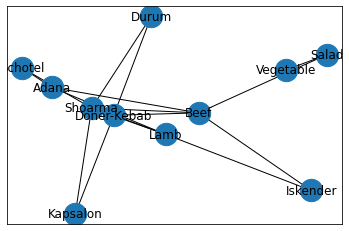

In [171]:
bn.ve_mpe(evidence=pd.Series({"Lamb": False}),
          order='min_degree_order').head(1)

In [184]:
bn.ve_map(set(['Schotel']),
          evidence=pd.Series({"Doner-Kebab": True}),
          order='min_degree_order').sort_values('p', ascending=False)  #.head(1)

,Schotel,p
1,True,0.911592
0,False,0.088408
